## **VISÃO COMPUTACIONAL - AULA 08**

**Objetivos da aula:**

*   conhecer o processo genérico de filtragem no domínio espacial
*   conhecer os filtros de blurring
*   conhecer o problema de ruído em imagens
*   conhecer o filtro de sharpening










**FILTRAGEM NO DOMÍNIO ESPACIAL**

A **filtragem no domínio espacial** ocorre com a aplicação de **filtros** (matrizes), posicionados sob cada pixel da imagem. Estes filtros, normalmente, são chamados de **kernels (ou núcleos)**. O resultado final do valor do pixel é calculado através de um **produto de convolução**.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
convolution = cv2.imread('convolution.png')
plt.imshow(convolution);

Existem diversos problemas de Visão Computacional e Processamento de Imagens que podem ser resolvidos com o processo de produto de convolução.

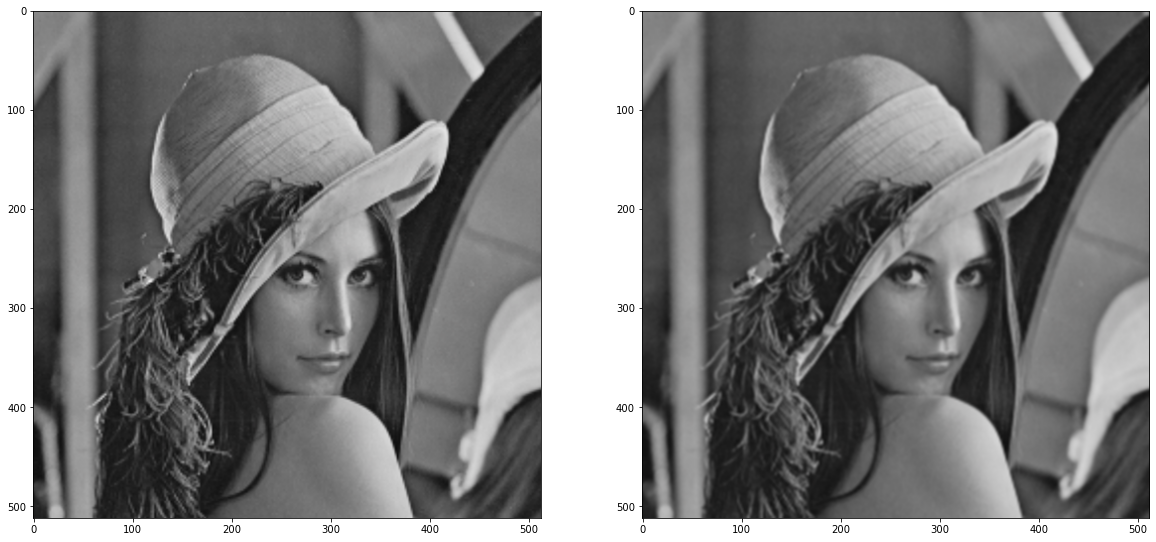

In [15]:
lena = cv2.imread('lena.png')
kernel = np.ones((3, 3), np.float32) / 9
imgf = cv2.filter2D(lena, -1, kernel)

f, axarr = plt.subplots(1,2, figsize=(20, 20))
axarr[0].imshow(lena)
axarr[1].imshow(imgf)
plt.show()

EXERCÍCIO

(a) qual é o efeito do filtro mostrado no exemplo anterior ? <br>
efeito de blur

(b) implemente o processo de convolução com o kernel dado, comparando os resultados com o filter2D.

In [55]:
#implemente sua solução aqui
def convulation(img, kernel):
    img_cp = np.zeros(img.shape)
    row = int(kernel.shape[0]/2)
    col = int(kernel.shape[1]/2)

    for i in range(row, img.shape[0] - row):
        for j in range(col, img.shape[1] - col):
            for x in range(kernel.shape[0]):
                for y in range(kernel.shape[1]):
                    img_cp[i, j] += img[i-row+x, j-col+y] * kernel[x, y]
    return img_cp.astype(int)
             

In [53]:
test = convulation(lena, kernel)

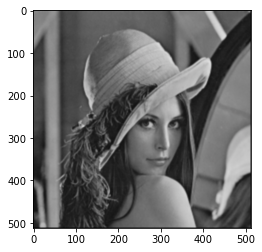

In [54]:
plt.imshow(test)

O processo de calcular a convolução nos bordos da imagem é que não temos valores associados aos pixels de fora da imagem. Para isto, podemos colocar uma "moldura" em torno da imagem.

O código abaixo irá colocar uma moldura de 1 pixel em torno da imagem.




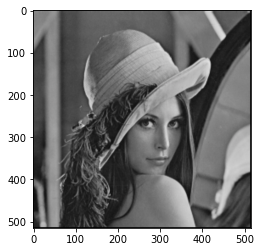

In [39]:
rows, cols = lena.shape[:2]
T = np.float32([[1, 0, 1], 
                [0, 1, 1]])
imgt = cv2.warpAffine(lena, T, (cols+3, rows+3))
plt.imshow(imgt)

**EXERCÍCIO**

Implemente novamente o produto de convolução, porém agora usando uma matriz com moldura.


In [56]:
#implemente sua solução aqui
def convulation(img, kernel):
    row = int(kernel.shape[0]/2)
    col = int(kernel.shape[1]/2)
    img_cp = np.zeros(img.shape)
    T = np.float32([[1, 0, 1], 
                    [0, 1, 1]])
    img_cp = cv2.warpAffine(img_cp, T, (img.shape[0]+row, rowsimg.shape[1]+col))

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for x in range(kernel.shape[0]):
                for y in range(kernel.shape[1]):
                    img_cp[i, j] += img[i-row+x, j-col+y] * kernel[x, y]
    return img_cp.astype(int)
             

**FILTROS PARA BLURRING**

O filtro de **blurring (borramento)** consiste na  perda gradual de foco da imagem, produzindo a sensação que ela está borrada. 

Existem diversos métodos para construções de kernels para blurring:


*   **filtro da média (box filter)**: blur = cv.blur(img,(5,5))
*   **filtro gaussiano**: blur = cv.GaussianBlur(img,(5,5),0)
*   **filtro da mediana**: blur = cv.medianBlur(img,5)
*   **filtro bilateral**: blur = cv.bilateralFilter(img,9,75,75)



**EXERCÍCIO**

Compare os resultados dos filtros de blurring apresentados acima.

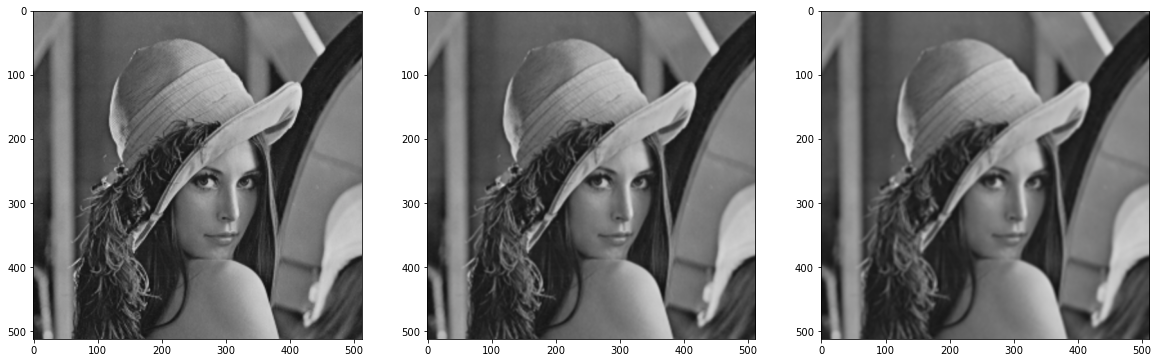

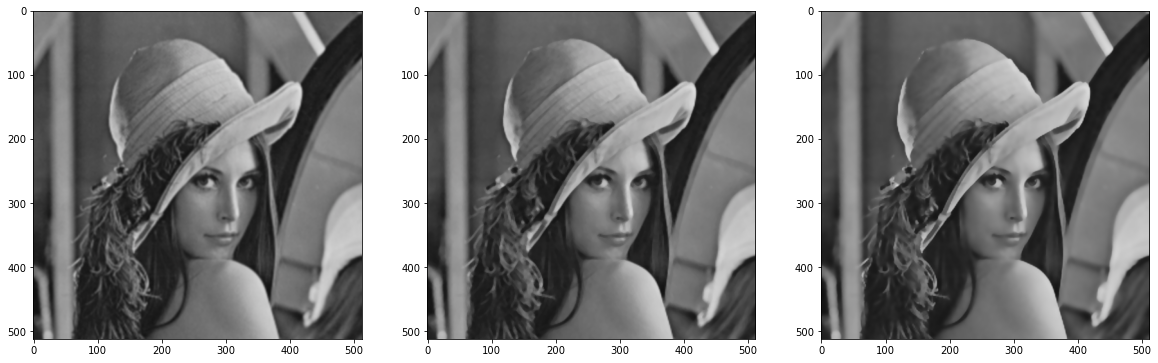

In [35]:
#implemente sua solução aqui
imgf = cv2.filter2D(lena, -1, kernel)

blur = cv2.blur(lena, (5, 5))
gaussian = cv2.GaussianBlur(lena, (5, 5), 0)
median = cv2.medianBlur(lena, 5)
bilateral = cv2.bilateralFilter(lena, 9, 75, 75)

f, axarr = plt.subplots(1, 3, figsize=(20, 20))
axarr[0].imshow(lena)
axarr[1].imshow(imgf)
axarr[2].imshow(blur)
plt.show()
f, axarrr = plt.subplots(1, 3, figsize=(20, 20))
axarrr[0].imshow(gaussian)
axarrr[1].imshow(median)
axarrr[2].imshow(bilateral)
plt.show()

**EXERCÍCIO**

Abaixo, temos as formas matriciais dos filtrosda média (box) e gaussiano. Reaplique estes dois filtros na imagem lena.jpg, porém agora usando um produto de convolução diretamente com os kernels mostrados abaixo.

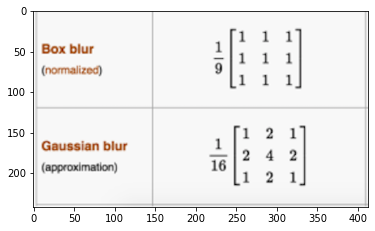

In [12]:
filters_img = cv2.imread('filters.png')
plt.imshow(filters_img);

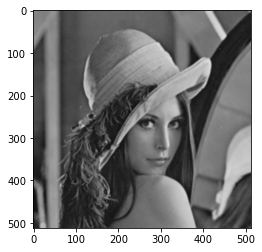

In [41]:
#implemente sua solução aqui
gaussian_kernel = np.float32([[1, 2, 1],
                              [2, 4, 2],
                              [1, 2, 1]]) / 16
imgf = cv2.filter2D(lena, -1, gaussian_kernel)
plt.imshow(imgf);

**EXERCÍCIO**

Uma das aplicações importantes dos filtros de blurring consiste na atenuação de ruído (noise) em imagens. Considerando a imagem com ruído abaixo, verifique quais dos filtros anteriores consegue atenuar de maneira mais efetiva o ruído.

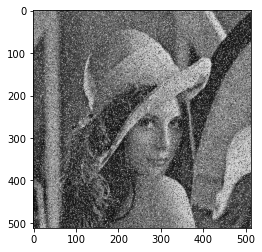

In [43]:
import random

def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

lena_noise = sp_noise(lena, 0.1)
plt.imshow(lena_noise);

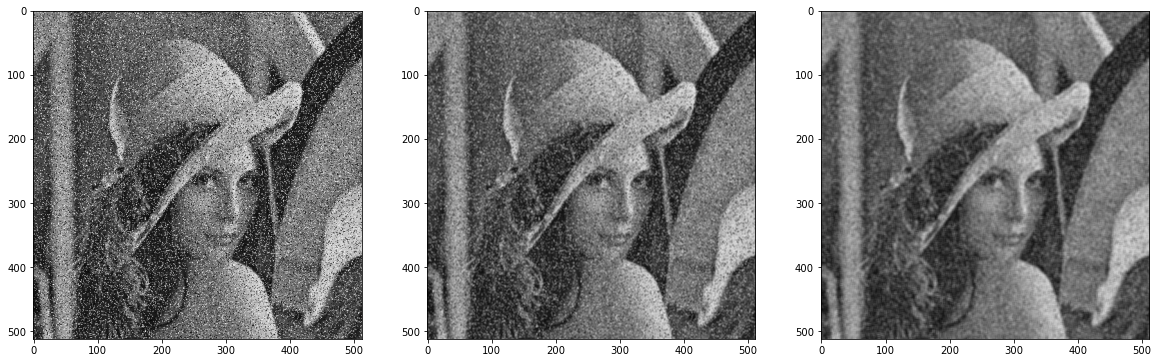

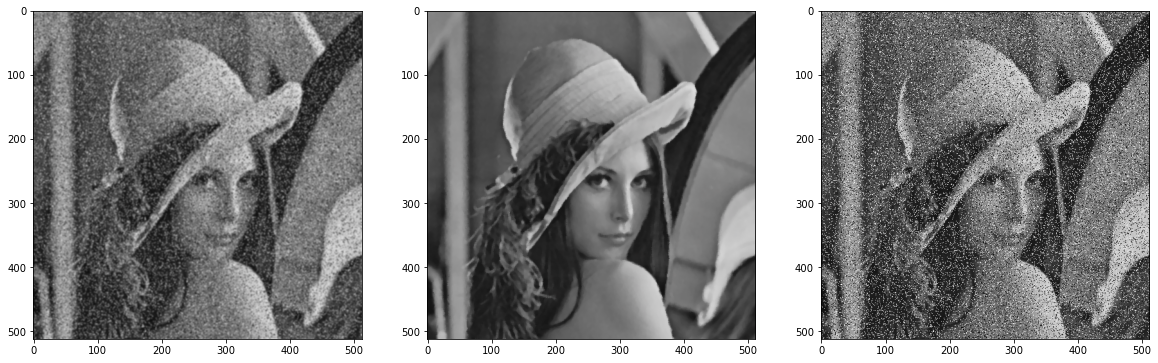

In [57]:
#inplemente sua solução aqui
kernel = np.ones((3, 3), np.float32) / 9
imgf = cv2.filter2D(lena_noise, -1, kernel)

blur = cv2.blur(lena_noise, (5, 5))
gaussian = cv2.GaussianBlur(lena_noise, (5, 5), 0)
median = cv2.medianBlur(lena_noise, 5)
bilateral = cv2.bilateralFilter(lena_noise, 9, 75, 75)

f, axarr = plt.subplots(1, 3, figsize=(20, 20))
axarr[0].imshow(lena_noise)
axarr[1].imshow(imgf)
axarr[2].imshow(blur)
plt.show()
f, axarrr = plt.subplots(1, 3, figsize=(20, 20))
axarrr[0].imshow(gaussian)
axarrr[1].imshow(median)
axarrr[2].imshow(bilateral)
plt.show()

**FILTRO DE SHARPENING**

O filtro de **sharpening** consiste no ganho gradual de foco de uma imagem, produzindo a sensação que ela está cada vez mais bem definida. É uma aproximação da inversa do filtro de blurring. 

Abaixo, temos uma forma matricial do filtro de sharpening.

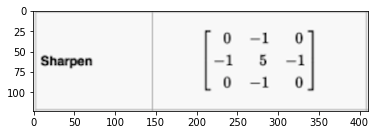

In [45]:
sharpen = cv2.imread('sharpen.png')
plt.imshow(sharpen);

**EXERCÍCIO**

Implemente o filtro de sharpening através de um produto de convolução em OpenCV.

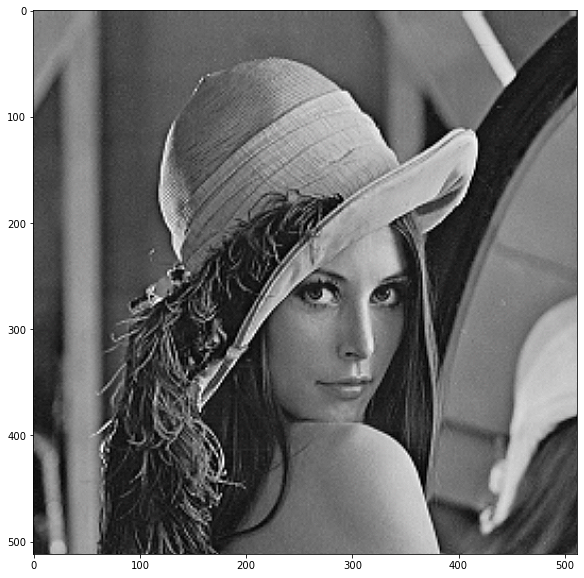

In [59]:
#implemente sua solução aqui
kernel_sharp = np.array([[ 0, -1,  0],
                         [-1,  5, -1],
                         [ 0, -1,  0]])
lena_sharp = cv2.filter2D(lena, -1, kernel_sharp)
plt.figure(figsize=(10, 10))
plt.imshow(lena_sharp);

**EXERCÍCIO**

Modique os pesos presentes no kernel do filtro de sharpening para verificar seus efeitos.

In [ ]:
#implemente sua solução aqui